In [6]:
import pandas as pd 
import numpy as np 

loan_data = pd.read_csv('loan_data.csv')
loan_data.head(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


#### 2. Demonstrate the basic statistics of different features, i.e., count, mean, std, min, max, and 25:50:75% percentiles.


In [7]:
loan_data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9577.000000,9577.000000,9577.000000,9577.000000,9577.000000,9577.000000,9577.000000,9.577000e+03,9577.000000,9577.000000,9577.000000,9577.000000,9577.000000
mean,0.805054,0.122638,319.033619,10.932082,12.606295,710.844106,4560.748482,1.691177e+04,46.798171,1.577007,0.163726,0.062128,0.159967
std,0.396180,0.026848,207.010102,0.614835,6.884227,37.971904,2497.060076,3.375727e+04,29.015745,2.199896,0.546241,0.262139,0.366594
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.210000,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928238,12.660000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.350000,11.291780,17.950000,737.000000,5730.000000,1.824200e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


#### 3. Show the breakup of credit approval status. In our original data, 1 indicates “approved”, 0 means “not approved”.


In [8]:
print('Approved:1 \nNot Approved:0')
loan_data['credit.policy'].value_counts()

Approved:1 
Not Approved:0


1    7710
0    1867
Name: credit.policy, dtype: int64

#### 4. Plot the histogram of installments by “approved” and “not approved”.

In [9]:
loan_approved_data = loan_data.loc[loan_data['credit.policy'] == 1]

loan_approved_data Histogram


<AxesSubplot:>

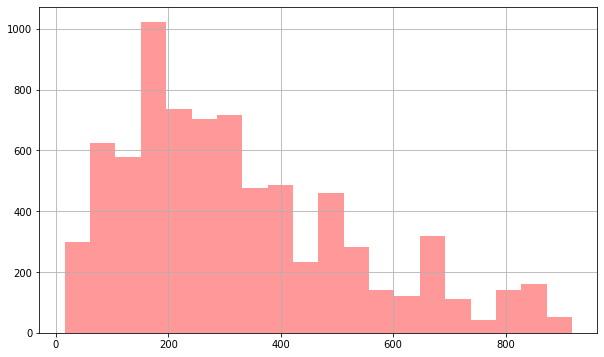

In [10]:
print('loan_approved_data Histogram')
loan_approved_data['installment'].hist(bins=20, color='r',alpha=0.4, figsize=(10,6))

In [11]:
loan_napproved_data = loan_data.loc[loan_data['credit.policy'] == 0]

loan_not_approved_data Histogram


<AxesSubplot:>

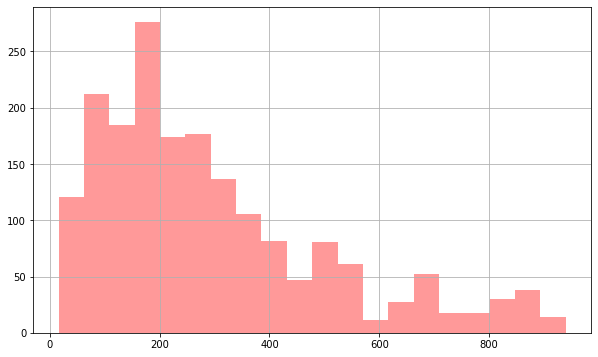

In [12]:
print('loan_not_approved_data Histogram')
loan_napproved_data['installment'].hist(bins=20, color='r',alpha=0.4, figsize=(10,6))

#### 5. Illustrate with boxplot Fico score varies between “approved” and “not approved” borrowers.


loan_approved_data fico boxplot


<AxesSubplot:>

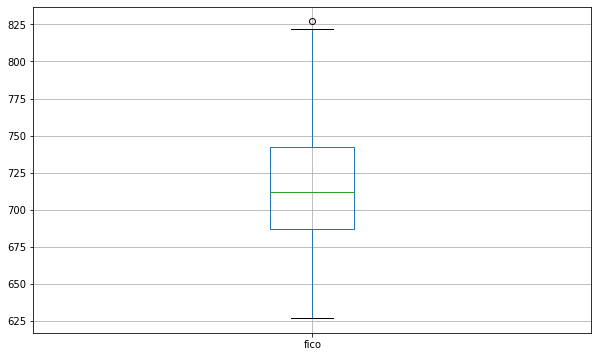

In [13]:
print('loan_approved_data fico boxplot')

loan_approved_data.boxplot(column=['fico'], figsize=(10,6))

loan_not_approved_data fico boxplot


<AxesSubplot:>

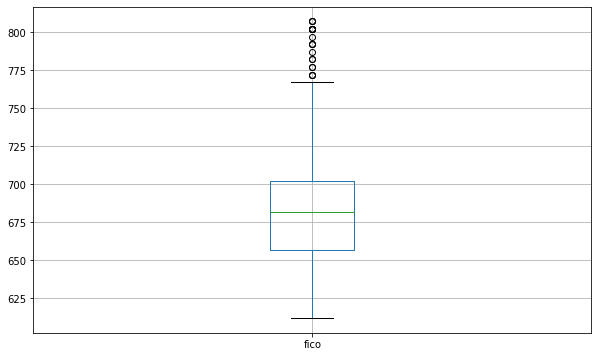

In [14]:
print('loan_not_approved_data fico boxplot')
loan_napproved_data.boxplot(column=['fico'], figsize=(10,6))

#### 2.2.1 Data Preprocessing and Splitting
##### The “purpose” feature in our dataset takes different nominal values, i.e., “credit card”, “debt consolidation”, “educational”, “major purchase”, “small business”, and “all other”. In this question, please convert them with dummy variables so sklearn can recognize them. More specifically, it can be expanded into 6 different features, with each indicating whether a special purpose is served with a boolean value.

In [15]:
# df2 = loan_data.select_dtypes(include = ['purpose'])

purpose_categorical_variables = pd.get_dummies(loan_data['purpose'])

loan_data_with_dummy_purpose_category = pd.concat([loan_data,purpose_categorical_variables,], axis=1)
loan_data_with_dummy_purpose_category.head(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,...,delinq.2yrs,pub.rec,not.fully.paid,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,...,0,0,0,0,0,1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,...,0,0,0,0,1,0,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,...,0,0,0,0,0,1,0,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,...,0,0,0,0,0,1,0,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,...,1,0,0,0,1,0,0,0,0,0


#### To evaluate the effectiveness of your method, the whole data should be split into two parts. In this question, a ratio of 70%: 30% is set between training and testing data, i.e., you need to randomly select 70% of the data as training, and leave the rest as testing data.


In [16]:
# X_loan_data = loan_data_with_dummy_purpose_category.loc[:, loan_data_with_dummy_purpose_category.columns != 'credit.policy']

# exclude 'credit.policy','purpose'
X_loan_data = loan_data_with_dummy_purpose_category.drop(['credit.policy','purpose'], axis=1)

y_loan_policy = loan_data_with_dummy_purpose_category['	not.fully.paid']

# X_loan_data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_loan_data, y_loan_policy, test_size=0.3, random_state=13)

##### 2.2.2 Training a Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier 

# Decision Tree classifer
clf_info_gain = DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree
clf_info_gain = clf_info_gain.fit(X_train,y_train)

# Predict
y_pred_info_gain = clf_info_gain.predict(X_test)

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

print("Info_gain Accuracy:",metrics.accuracy_score(y_test, y_pred_info_gain))

Info_gain Accuracy: 0.9930410577592206


In [57]:
from sklearn.tree import DecisionTreeClassifier 

# Decision Tree classifer
clf_gini = DecisionTreeClassifier(criterion="gini")

# Train Decision Tree
clf_gini = clf_gini.fit(X_train,y_train)

# Predict
y_pred_gini = clf_gini.predict(X_test)

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

print("Gini Accuracy:",metrics.accuracy_score(y_test, y_pred_gini))


Gini Accuracy: 0.9909533750869868


### 2.3 Performance Evaluation and Analysis: 5 points
##### To compare the performance of different approaches, we usually examine our model with testing data using various evaluation metrics. In this question, please show confusion matrix, precision, recall, and f-score on both Information Gain and Gini based methods.


In [58]:
from sklearn.metrics import classification_report,confusion_matrix

target_names = ['Not Approved', 'Approved']

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred_info_gain))


print("\nprecision, recall, and f-score:")
print(classification_report(y_test, y_pred_info_gain, target_names=target_names))

Confusion matrix:
[[ 516   11]
 [   9 2338]]

precision, recall, and f-score:
              precision    recall  f1-score   support

Not Approved       0.98      0.98      0.98       527
    Approved       1.00      1.00      1.00      2347

    accuracy                           0.99      2874
   macro avg       0.99      0.99      0.99      2874
weighted avg       0.99      0.99      0.99      2874



In [59]:

target_names = ['Not Approved', 'Approved']

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred_gini))


print("\nprecision, recall, and f-score:")
print(classification_report(y_test, y_pred_gini, target_names=target_names))

Confusion matrix:
[[ 510   17]
 [   9 2338]]

precision, recall, and f-score:
              precision    recall  f1-score   support

Not Approved       0.98      0.97      0.98       527
    Approved       0.99      1.00      0.99      2347

    accuracy                           0.99      2874
   macro avg       0.99      0.98      0.98      2874
weighted avg       0.99      0.99      0.99      2874



#### Analyzing the results:
##### As per the obtained results, we can see that the performance of decision tree is is similar, using gini or information gain method . The information gain method is slightly better than gini based method. Using Information gain method Accuracy on test set is 99.3% and using gini based method it is 99%

##### Obtaining 99% Accuracy on test set is indeed great generalization.

##### When we check the confusion matrix and evaluate performance using precision/recall/f1 score, we can conculde that comparatively the algorithm is performing bad on "Not approved" class examples. Adding more examples of "not approved" class to our dataset may help to improve the algorithm.

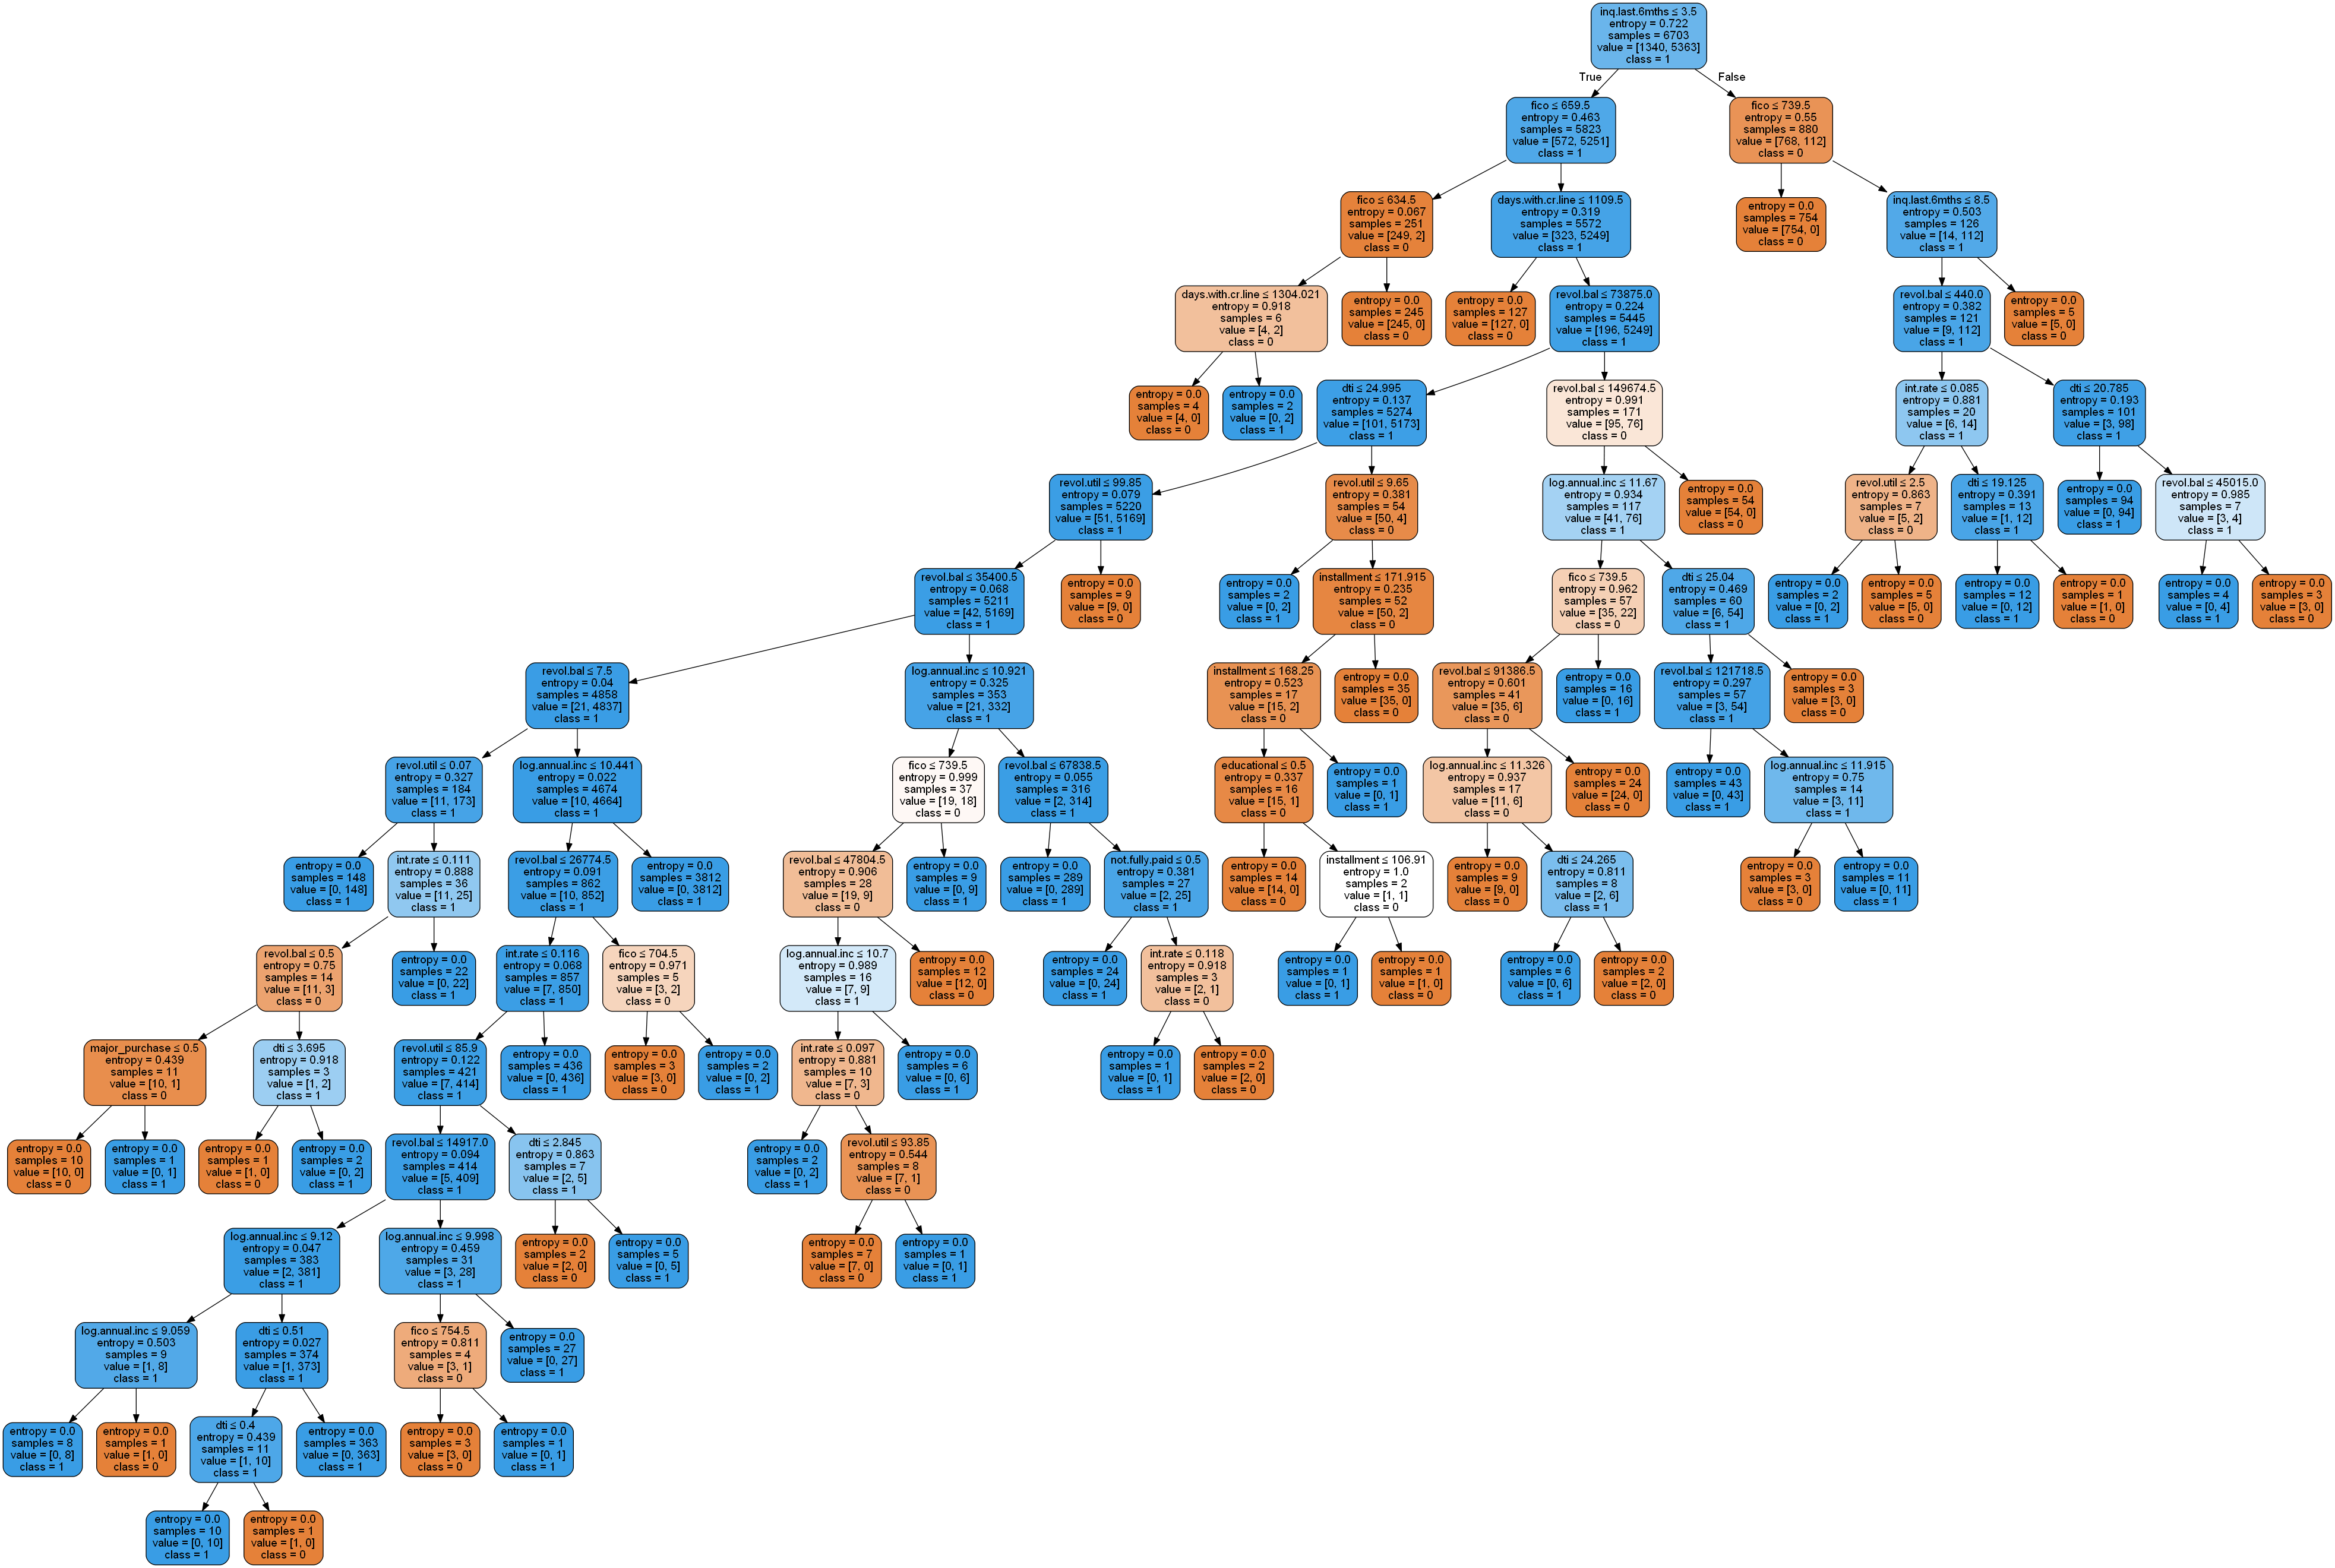

In [60]:
# Visualizing Decision Tree 
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf_info_gain, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_train.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('loan_rating.png')
Image(graph.create_png())

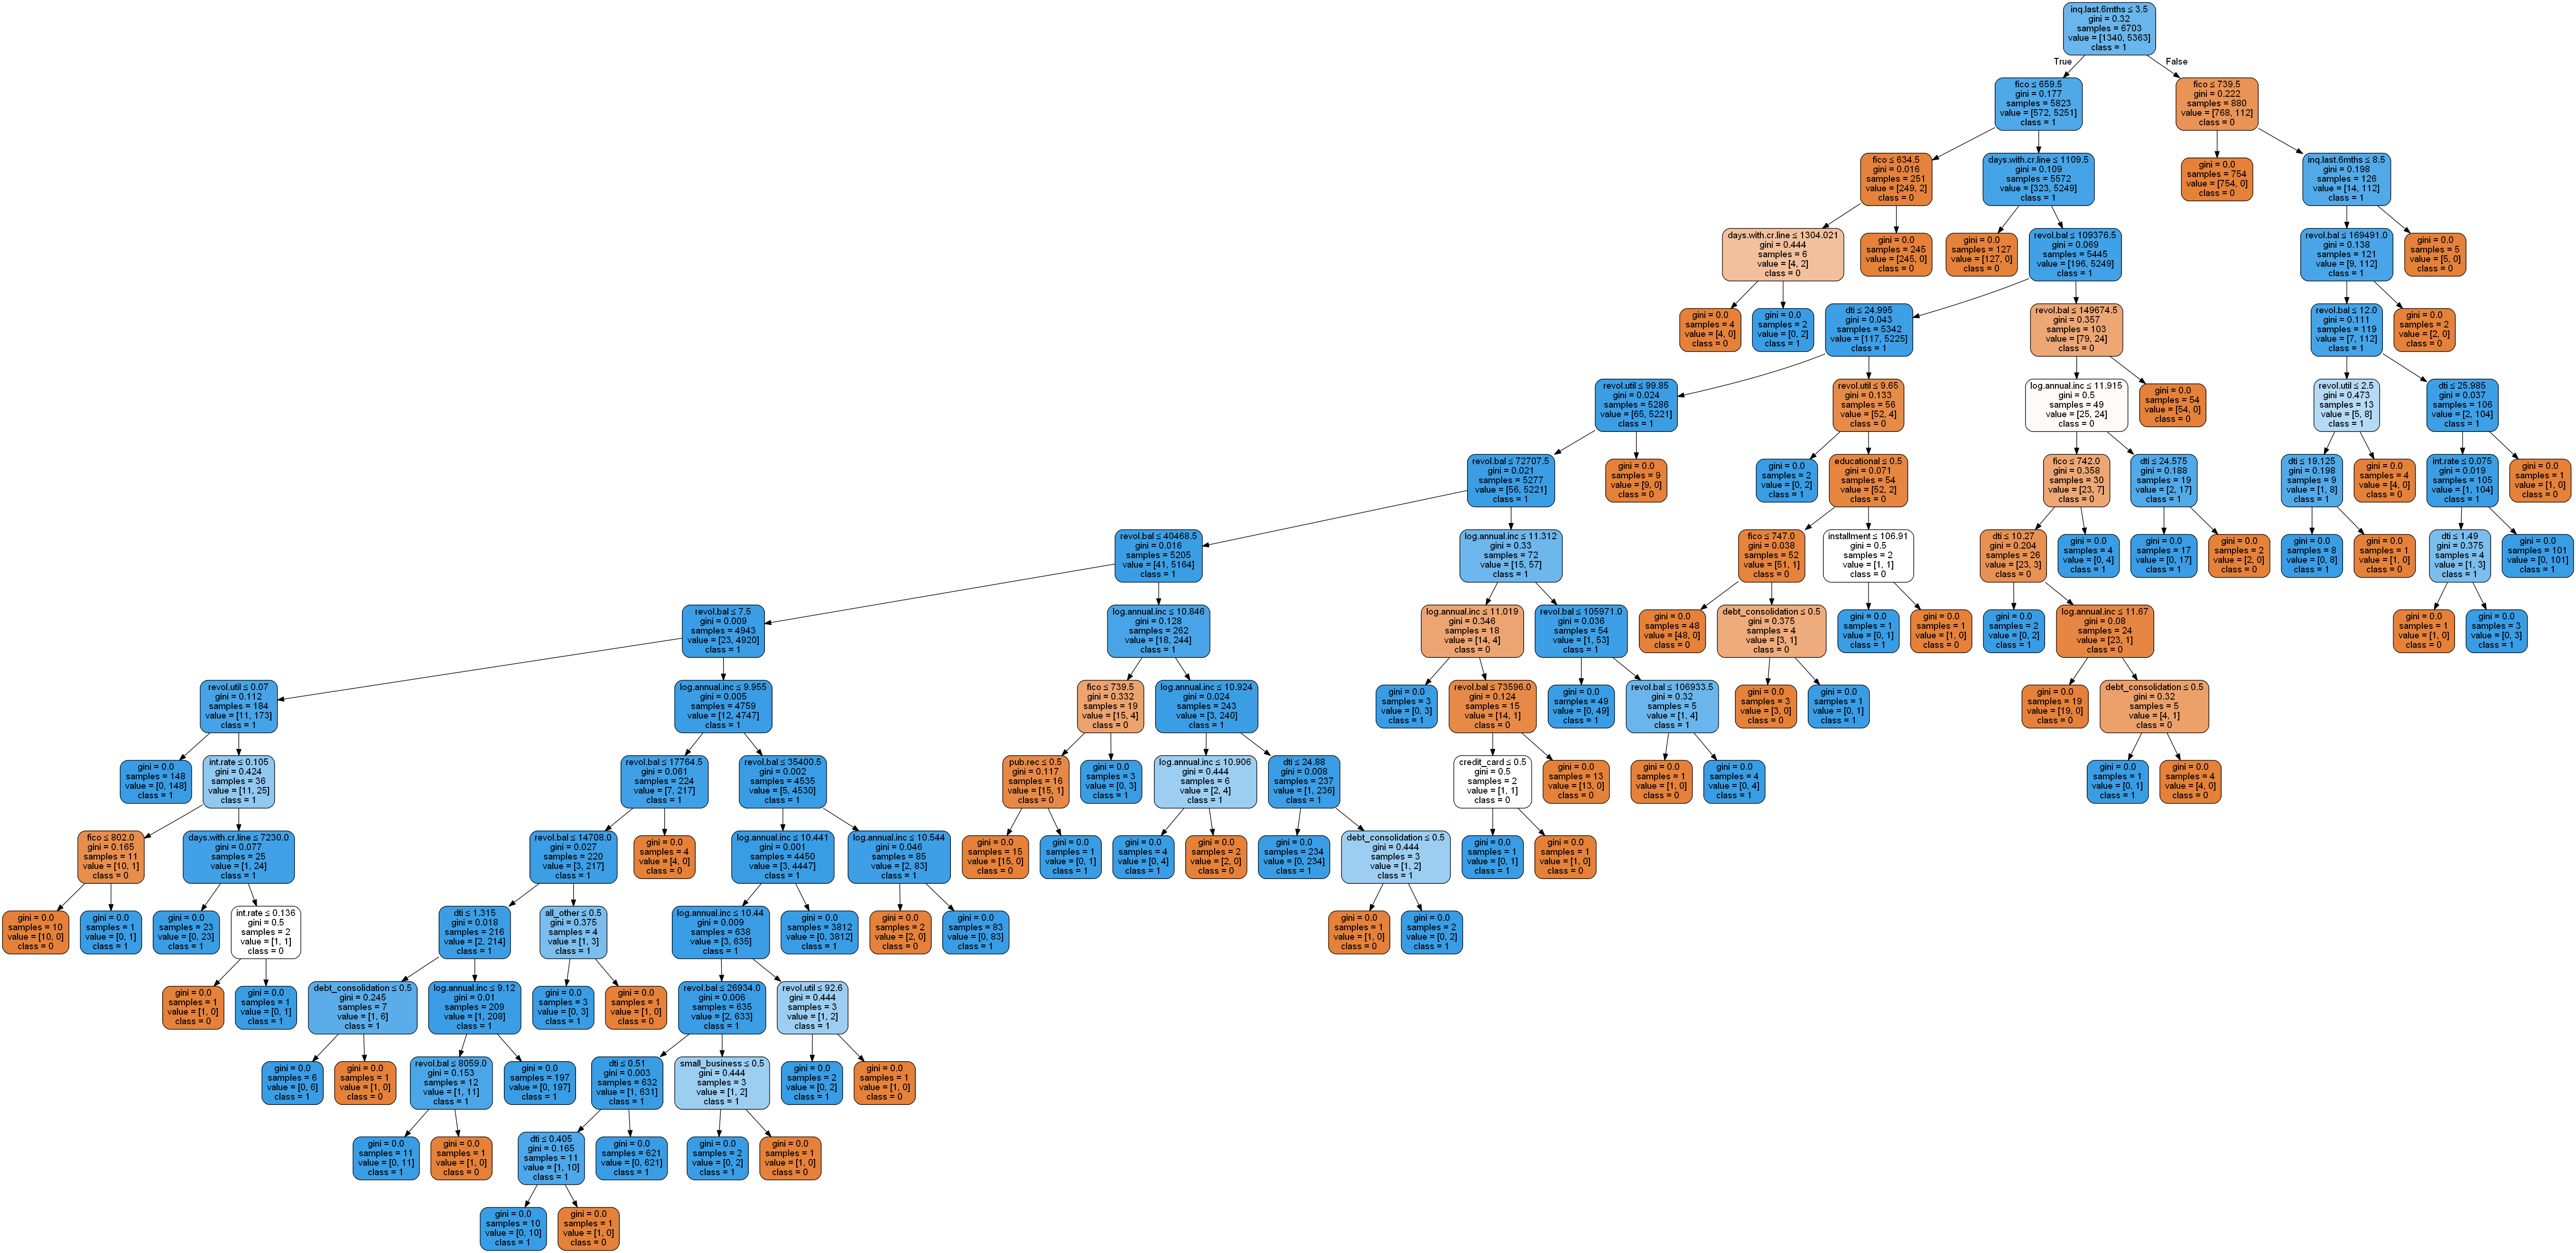

In [61]:
# Visualizing Decision Tree 
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_train.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('loan_rating.png')
Image(graph.create_png())